<a href="https://colab.research.google.com/github/yinwongtrains/Door-Opening-Closing/blob/main/Door_Opening_and_Closing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column
import matplotlib.pyplot as plt




## Import the data

In [2]:
# read the csv file and clean it up.
df = (pd
      # .read_csv('data/A23_door_opening (1).csv')
      .read_csv('/content/drive/MyDrive/Colab Notebooks/A23_door_opening (1).csv')
      .pivot(index=['SNAPSHOT_DATETIME'], columns=['SIGNAL_NAME'], values='SIGNAL_VALUE_N')
      .reset_index()
      .sort_values(by='SNAPSHOT_DATETIME')
)

df['SNAPSHOT_DATETIME'] = pd.to_datetime(df['SNAPSHOT_DATETIME'])

display(df)
print(f'\nCheck number of signals >> {len(df.columns)}')

SIGNAL_NAME,SNAPSHOT_DATETIME,RM2DCRDCT3,RM2DCRDCT4,RM2DCRDCT5,RM2DCRDCT6,RM2DCRDOT3,RM2DCRDOT4,RM2DCRDOT5,RM2DCRDOT6,RM3DCRDCT3,...,RT5DCRDOT5,RT5DCRDOT6,RT8DCRDCT3,RT8DCRDCT4,RT8DCRDCT5,RT8DCRDCT6,RT8DCRDOT3,RT8DCRDOT4,RT8DCRDOT5,RT8DCRDOT6
0,2022-05-18 00:08:34,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
1,2022-05-18 00:18:35,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
2,2022-05-18 00:28:55,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
3,2022-05-18 00:38:56,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
4,2022-05-18 00:49:15,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,2022-07-17 23:19:19,47.0,47.0,47.0,46.0,46.0,48.0,46.0,48.0,46.0,...,47.0,46.0,47.0,46.0,47.0,46.0,46.0,48.0,46.0,48.0
7274,2022-07-17 23:29:33,47.0,46.0,47.0,47.0,47.0,49.0,46.0,49.0,46.0,...,46.0,46.0,47.0,48.0,47.0,47.0,46.0,45.0,46.0,45.0
7275,2022-07-17 23:39:32,47.0,46.0,47.0,47.0,47.0,49.0,46.0,49.0,46.0,...,46.0,46.0,47.0,48.0,48.0,47.0,46.0,45.0,46.0,45.0
7276,2022-07-17 23:49:55,46.0,46.0,46.0,47.0,46.0,49.0,47.0,49.0,46.0,...,46.0,47.0,47.0,48.0,46.0,47.0,47.0,45.0,47.0,45.0



Check number of signals >> 65


## Define user inputs

In [3]:
# USER INPUTS

# define the signal (door and opening/closing)
signal = 'RT4DCRDCT6'
renamed_signal = 'Door Close'

# define start and end times
t1 = '2022-07-01'
t2 = '2022-07-18'

# define the rolling window
rolling_window = 30
frequency = '6H'

t1 = pd.Timestamp(t1)
t2 = pd.Timestamp(t2)

## Example calculation on Rolling calculation on raw data

In [4]:

# CALCULATION


df_working = (df[['SNAPSHOT_DATETIME', signal]]
              .rename(columns={signal: renamed_signal})
              .loc[(df['SNAPSHOT_DATETIME'] >= t1) & (df['SNAPSHOT_DATETIME'] <= t2)]
              .loc[(df[signal] < 60)] # eliminate outliers
              .set_index('SNAPSHOT_DATETIME')
)

df_working['SNAPSHOT_DATETIME'] = df_working.index

df_working['Rolling Mean'] = df_working[renamed_signal].rolling(frequency).mean()
df_working['Rolling Median'] = df_working[renamed_signal].rolling(frequency).median()
df_working['Rolling Std'] = df_working[renamed_signal].rolling(frequency).std()

display(df_working)


output_notebook()

# Create a figure object
p = figure(title=f'{renamed_signal}', x_axis_type="datetime", width=1000)

# Add a scatter plot
p.scatter(df_working['SNAPSHOT_DATETIME'], df_working[renamed_signal], color='blue', alpha=0.5, legend_label=f'{renamed_signal}')
p.scatter(df_working['SNAPSHOT_DATETIME'], df_working['Rolling Mean'], color='red', alpha=0.5, legend_label=f'Rolling Mean {frequency}')
p.scatter(df_working['SNAPSHOT_DATETIME'], df_working['Rolling Median'], color='green', alpha=0.5, legend_label=f'Rolling Median {frequency}')
# p.scatter(df_working['SNAPSHOT_DATETIME'], df_working['Rolling Std'], color='orange')

p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"

#######################

p2 = figure(title=f'{renamed_signal}', x_axis_type="datetime", width=1000)

p2.scatter(df_working['SNAPSHOT_DATETIME'], df_working['Rolling Std'], color='orange', alpha=0.5, legend_label=f'Rolling Std {frequency}')

p2.legend.label_text_font_size = "10pt"
p2.legend.location = "top_left"

########################

# Show the plot
show(column([p, p2]))



SIGNAL_NAME,Door Close,SNAPSHOT_DATETIME,Rolling Mean,Rolling Median,Rolling Std
SNAPSHOT_DATETIME,,,,,
2022-07-01 00:00:12,46.0,2022-07-01 00:00:12,46.000000,46.0,NaN
2022-07-01 00:10:36,46.0,2022-07-01 00:10:36,46.000000,46.0,0.000000
2022-07-01 00:20:41,46.0,2022-07-01 00:20:41,46.000000,46.0,0.000000
2022-07-01 00:30:51,46.0,2022-07-01 00:30:51,46.000000,46.0,0.000000
2022-07-01 00:40:59,46.0,2022-07-01 00:40:59,46.000000,46.0,0.000000
...,...,...,...,...,...
2022-07-17 23:19:19,46.0,2022-07-17 23:19:19,46.500000,47.0,0.567962
2022-07-17 23:29:33,46.0,2022-07-17 23:29:33,46.531250,47.0,0.507007
2022-07-17 23:39:32,46.0,2022-07-17 23:39:32,46.515152,47.0,0.507519


## Example Calculation Removing adjacent duplicates

In [5]:
df_reduce = (df[['SNAPSHOT_DATETIME', signal]]
              .rename(columns={signal: renamed_signal})
              .loc[(df['SNAPSHOT_DATETIME'] >= t1) & (df['SNAPSHOT_DATETIME'] <= t2)]
              # .loc[(df[signal] < 60)] # eliminate outliers
              .set_index('SNAPSHOT_DATETIME')
)

df_reduce['SNAPSHOT_DATETIME'] = df_reduce.index

# calculate the difference between each value and the previous to identify if it is the same
df_reduce['diff'] = df_reduce[renamed_signal].diff()
df_reduce = df_reduce[df_reduce['diff']!=0]

df_reduce['Rolling Mean'] = df_reduce[renamed_signal].rolling(frequency).mean()
df_reduce['Rolling Median'] = df_reduce[renamed_signal].rolling(frequency).median()
df_reduce['Rolling Std'] = df_reduce[renamed_signal].rolling(frequency).std()

display(df_reduce)

output_notebook()

# Create a figure object
p = figure(title=f'{renamed_signal}', x_axis_type="datetime", width=1000)

# Add a scatter plot
p.scatter(df_reduce['SNAPSHOT_DATETIME'], df_reduce[renamed_signal], color='blue', alpha=0.5, legend_label=f'{renamed_signal}')
p.scatter(df_reduce['SNAPSHOT_DATETIME'], df_reduce['Rolling Mean'], color='red', alpha=0.5, legend_label=f'Rolling Mean {frequency}')
p.scatter(df_reduce['SNAPSHOT_DATETIME'], df_reduce['Rolling Median'], color='green', alpha=0.5, legend_label=f'Rolling Median {frequency}')
# p.scatter(df_working['SNAPSHOT_DATETIME'], df_working['Rolling Std'], color='orange')

p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"

#######################

p2 = figure(title=f'{renamed_signal}', x_axis_type="datetime", width=1000)

p2.scatter(df_reduce['SNAPSHOT_DATETIME'], df_reduce['Rolling Std'], color='orange', alpha=0.5, legend_label=f'Rolling Std {frequency}')

p2.legend.label_text_font_size = "10pt"
p2.legend.location = "top_left"

########################

# Show the plot
show(column([p, p2]))

SIGNAL_NAME,Door Close,SNAPSHOT_DATETIME,diff,Rolling Mean,Rolling Median,Rolling Std
SNAPSHOT_DATETIME,,,,,,
2022-07-01 00:00:12,46.0,2022-07-01 00:00:12,NaN,46.000000,46.0,NaN
2022-07-04 04:43:56,47.0,2022-07-04 04:43:56,1.0,47.000000,47.0,NaN
2022-07-04 04:54:04,46.0,2022-07-04 04:54:04,-1.0,46.500000,46.5,0.707107
2022-07-04 05:24:33,47.0,2022-07-04 05:24:33,1.0,46.666667,47.0,0.577350
2022-07-04 05:34:49,46.0,2022-07-04 05:34:49,-1.0,46.500000,46.5,0.577350
...,...,...,...,...,...,...
2022-07-17 22:28:40,47.0,2022-07-17 22:28:40,1.0,46.400000,46.0,0.632456
2022-07-17 22:38:41,46.0,2022-07-17 22:38:41,-1.0,46.400000,46.0,0.632456
2022-07-17 22:48:56,47.0,2022-07-17 22:48:56,1.0,46.437500,46.5,0.629153


## Functions

In [6]:

def run_everything(df_input, signal, t1, t2, frequency, calc_method, plot):

  # USER INPUTS


  if signal[7] == 'C':
    renamed_signal = 'Door Close'
  elif signal[7] == 'O':
    renamed_signal = 'Door Open'
  else:
    renamed_signal = 'Unknown Signal'

  t1 = pd.Timestamp(t1)
  t2 = pd.Timestamp(t2)

  df_working = reduce_to_rolling(df_input, renamed_signal)
  df_working = calc_stats(df_working, renamed_signal, calc_method)

  if plot == 1:
    plot_results(df_working, renamed_signal)

  return df_working

def reduce_to_rolling(df_input, renamed_signal):
  df_working = df_input.copy()

  df_working = (df[['SNAPSHOT_DATETIME', signal]]
                .rename(columns={signal: renamed_signal})
                .loc[(df['SNAPSHOT_DATETIME'] >= t1) & (df['SNAPSHOT_DATETIME'] <= t2)]
                # .loc[(df[signal] < 60)] # eliminate outliers
                .set_index('SNAPSHOT_DATETIME')
  )

  df_working['SNAPSHOT_DATETIME'] = df_working.index

  # calculate the difference between each value and the previous to identify if it is the same
  df_working['diff'] = df_working[renamed_signal].diff()
  df_working = df_working[df_working['diff']!=0]

  return df_working

def calc_stats(df_input, renamed_signal, calc_method):
  df_working = df_input.copy()

  if calc_method == 'rolling':
    df_working['Mean'] = df_working[renamed_signal].rolling(frequency).mean()
    df_working['Median'] = df_working[renamed_signal].rolling(frequency).median()
    df_working['Std'] = df_working[renamed_signal].rolling(frequency).std()

  if calc_method == 'grouping':
    df_working = (df_working
                  .groupby(pd.Grouper(freq=frequency)).agg({renamed_signal: ['mean', 'median', 'std']})
                  .reset_index()
    )

    df_working.columns = ['SNAPSHOT_DATETIME', 'Mean', 'Median', 'Std']

  df_working[renamed_signal] = df_working['Mean']


  return df_working

def plot_results(df_input, renamed_signal):
  output_notebook()

  # Create a figure object
  p = figure(title=f'{renamed_signal}', x_axis_type="datetime", height=300, width=1000)

  # Add a scatter plot
  p.scatter(df_input['SNAPSHOT_DATETIME'], df_input[renamed_signal], color='blue', alpha=0.5, legend_label=f'{renamed_signal}')
  p.scatter(df_input['SNAPSHOT_DATETIME'], df_input['Mean'], color='red', alpha=0.5, legend_label=f'Mean {frequency}')
  p.scatter(df_input['SNAPSHOT_DATETIME'], df_input['Median'], color='green', alpha=0.5, legend_label=f'Median {frequency}')

  p.legend.label_text_font_size = "10pt"
  p.legend.location = "top_left"

  #######################

  p2 = figure(title=f'{renamed_signal}', x_axis_type="datetime", height=300, width=1000)

  p2.scatter(df_input['SNAPSHOT_DATETIME'], df_input['Std'], color='orange', alpha=0.5, legend_label=f'Std {frequency}')

  p2.legend.label_text_font_size = "10pt"
  p2.legend.location = "top_left"

  ########################

  # Show the plot
  show(column([p2]))

  #########################
  # plot histograms of standard deviations

  plt.figure(figsize=(8, 6))
  plt.hist(df_input['Std'], bins=20, edgecolor='black', alpha=0.7)
  plt.title('Histogram of Std')
  plt.xlabel('Standard Deviation Values')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

## Main()

In [7]:
# define start and end times
signal = 'RT4DCRDCT6'
t1 = '2022-07-01'
t2 = '2022-07-18'
frequency = '6H'
calc_method = 'grouping'
plot = 1

# df_out = run_everything(df, signal, t1, t2, frequency, calc_method, plot)


In [8]:
t1 = '2022-07-01'
t2 = '2022-07-18'
frequency = '6H'
calc_method = 'grouping'
plot = 1


for signal in ['RT4DCRDCT3', 'RT4DCRDCT4', 'RT4DCRDCT5',
       'RT4DCRDCT6', 'RT4DCRDOT3', 'RT4DCRDOT4', 'RT4DCRDOT5', 'RT4DCRDOT6',
       'RT5DCRDCT3', 'RT5DCRDCT4', 'RT5DCRDCT5', 'RT5DCRDCT6', 'RT5DCRDOT3',
       'RT5DCRDOT4', 'RT5DCRDOT5', 'RT5DCRDOT6']:
  print(signal)
  # df_out = run_everything(df, signal, t1, t2, frequency, calc_method, plot)



RT4DCRDCT3
RT4DCRDCT4
RT4DCRDCT5
RT4DCRDCT6
RT4DCRDOT3
RT4DCRDOT4
RT4DCRDOT5
RT4DCRDOT6
RT5DCRDCT3
RT5DCRDCT4
RT5DCRDCT5
RT5DCRDCT6
RT5DCRDOT3
RT5DCRDOT4
RT5DCRDOT5
RT5DCRDOT6


# Investigation - Showing distributions

In [9]:
# list all signals
signals_list = df.columns[1:]

closing_signals = [signal for signal in signals_list if signal[7] == 'C']
opening_signals = [signal for signal in signals_list if signal[7] == 'O']
T1_signals = [signal for signal in signals_list if signal[2] == '1']
M2_signals = [signal for signal in signals_list if signal[2] == '2']
M3_signals = [signal for signal in signals_list if signal[2] == '3']
T4_signals = [signal for signal in signals_list if signal[2] == '4']
T5_signals = [signal for signal in signals_list if signal[2] == '5']
M6_signals = [signal for signal in signals_list if signal[2] == '6']
M7_signals = [signal for signal in signals_list if signal[2] == '7']
T8_signals = [signal for signal in signals_list if signal[2] == '8']



In [10]:
# read the csv file and clean it up.
df = (pd
      # .read_csv('data/A23_door_opening (1).csv')
      .read_csv('/content/drive/MyDrive/Colab Notebooks/A23_door_opening (1).csv')
      .pivot(index=['SNAPSHOT_DATETIME'], columns=['SIGNAL_NAME'], values='SIGNAL_VALUE_N')
      .reset_index()
      .sort_values(by='SNAPSHOT_DATETIME')
)

df['SNAPSHOT_DATETIME'] = pd.to_datetime(df['SNAPSHOT_DATETIME'])

display(df)
print(f'\nCheck number of signals >> {len(df.columns)}')

SIGNAL_NAME,SNAPSHOT_DATETIME,RM2DCRDCT3,RM2DCRDCT4,RM2DCRDCT5,RM2DCRDCT6,RM2DCRDOT3,RM2DCRDOT4,RM2DCRDOT5,RM2DCRDOT6,RM3DCRDCT3,...,RT5DCRDOT5,RT5DCRDOT6,RT8DCRDCT3,RT8DCRDCT4,RT8DCRDCT5,RT8DCRDCT6,RT8DCRDOT3,RT8DCRDOT4,RT8DCRDOT5,RT8DCRDOT6
0,2022-05-18 00:08:34,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
1,2022-05-18 00:18:35,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
2,2022-05-18 00:28:55,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
3,2022-05-18 00:38:56,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
4,2022-05-18 00:49:15,46.0,46.0,46.0,47.0,47.0,45.0,47.0,46.0,47.0,...,46.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,2022-07-17 23:19:19,47.0,47.0,47.0,46.0,46.0,48.0,46.0,48.0,46.0,...,47.0,46.0,47.0,46.0,47.0,46.0,46.0,48.0,46.0,48.0
7274,2022-07-17 23:29:33,47.0,46.0,47.0,47.0,47.0,49.0,46.0,49.0,46.0,...,46.0,46.0,47.0,48.0,47.0,47.0,46.0,45.0,46.0,45.0
7275,2022-07-17 23:39:32,47.0,46.0,47.0,47.0,47.0,49.0,46.0,49.0,46.0,...,46.0,46.0,47.0,48.0,48.0,47.0,46.0,45.0,46.0,45.0
7276,2022-07-17 23:49:55,46.0,46.0,46.0,47.0,46.0,49.0,47.0,49.0,46.0,...,46.0,47.0,47.0,48.0,46.0,47.0,47.0,45.0,47.0,45.0



Check number of signals >> 65


In [33]:
def prepare_df(df_input, signal, t1, t2):
  '''
  1. Start with imported df
  2. reduce to t1 and t2
  3. reduce to only snapshot_datetime and signal
  4. fix up the index
  '''
  df_working = df_input.copy()
  t1 = pd.Timestamp(t1)
  t2 = pd.Timestamp(t2)

  df_working = (df[['SNAPSHOT_DATETIME', signal]]
              .rename(columns={signal: 'signal_value'})
              .loc[(df['SNAPSHOT_DATETIME'] >= t1) & (df['SNAPSHOT_DATETIME'] <= t2)]
              # .loc[(df[signal] < 60)] # eliminate outliers
              .set_index('SNAPSHOT_DATETIME')
  )

  df_working['SNAPSHOT_DATETIME'] = df_working.index

  return df_working

def remove_repeats(df_input):
  df_working = df_input.copy()
  original_size = len(df_working)
    # calculate the difference between each value and the previous to identify if it is the same
  df_working['diff'] = df_working['signal_value'].diff()
  df_working = df_working[df_working['diff']!=0]
  new_size = len(df_working)

  print(f'original size | new size | ratio  >>   {original_size} | { new_size} | {new_size / original_size:.2f}')

  return df_working

def plot_histogram(df_input, signal):
    df_working = df_input.copy()

    fig, axes = plt.subplots(1, 2, figsize=(8, 2))  # Create two subplots

    if signal == 'RT4DCRDCT6' or signal == 'RT4DCRDOT6':
      colour = 'red'
    else:
      colour = 'lightblue'

    # Plot 1: With xlim
    df_working['signal_value'].hist(bins=20, ax=axes[0], color=colour)
    axes[0].set_xlim(42, 53)
    axes[0].set_title('With xlim')

    # Plot 2: Without xlim
    df_working['signal_value'].hist(bins=20, ax=axes[1], color=colour)
    axes[1].set_title('Without xlim')

    mean = df_working['signal_value'].mean()
    median = df_working['signal_value'].median()
    std = df_working['signal_value'].std()

    print(f'mean | median | std >> {mean:.2f} | {median:.2f} | {std:.2f}')

    # Adjust layout

    plt.tight_layout()  # Adjust layout
    plt.show()

####################
RT4DCRDCT3
original data
mean | median | std >> 46.62 | 47.00 | 1.30


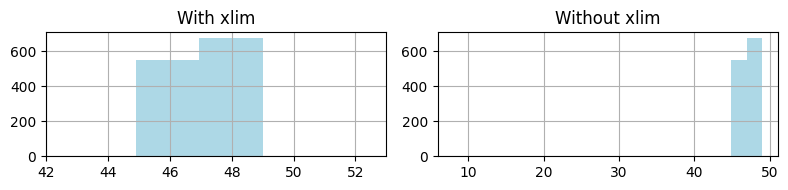

remove repeats
original size | new size | ratio  >>   1226 | 240 | 0.20
mean | median | std >> 46.63 | 47.00 | 2.64


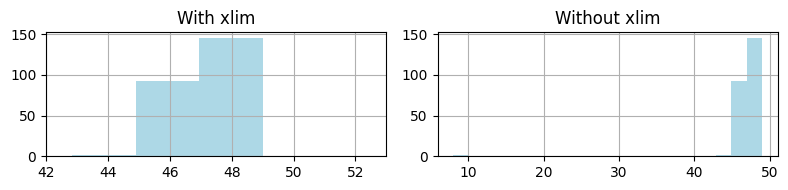

####################
RT4DCRDCT4
original data
mean | median | std >> 45.93 | 47.00 | 5.14


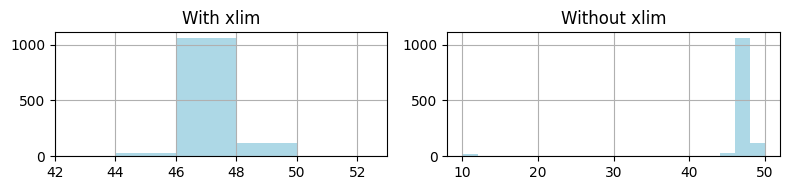

remove repeats
original size | new size | ratio  >>   1226 | 327 | 0.27
mean | median | std >> 46.77 | 47.00 | 2.30


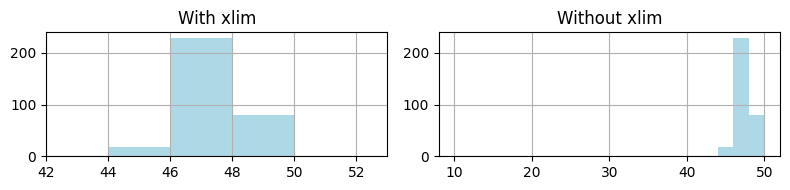

####################
RT4DCRDCT5
original data
mean | median | std >> 46.56 | 47.00 | 2.21


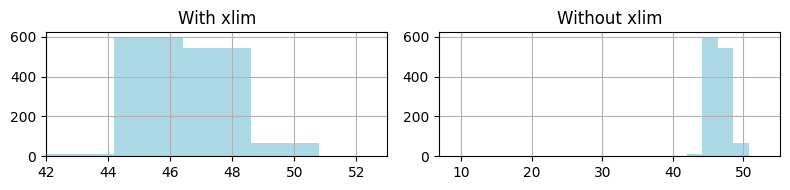

remove repeats
original size | new size | ratio  >>   1226 | 299 | 0.24
mean | median | std >> 46.47 | 47.00 | 3.81


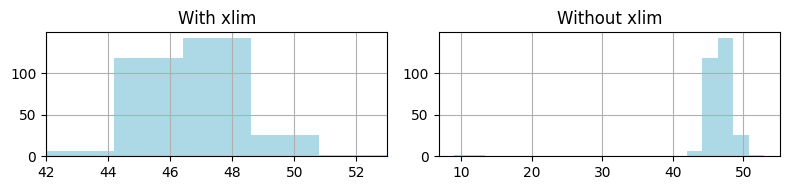

####################
RT4DCRDCT6
original data
mean | median | std >> 45.90 | 47.00 | 5.20


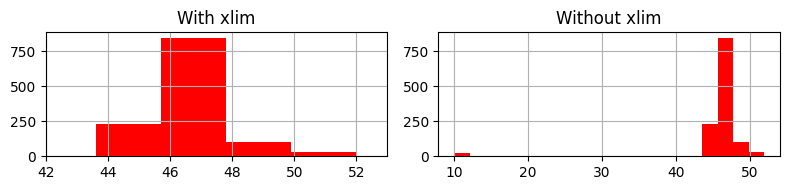

remove repeats
original size | new size | ratio  >>   1226 | 293 | 0.24
mean | median | std >> 46.59 | 47.00 | 3.20


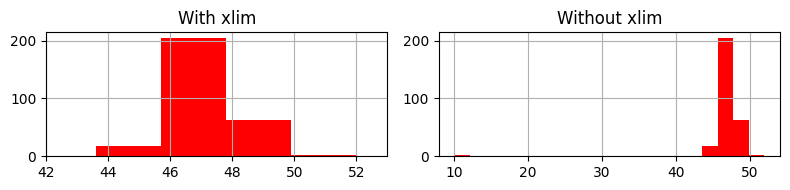

####################
RT4DCRDOT3
original data
mean | median | std >> 46.27 | 46.00 | 1.28


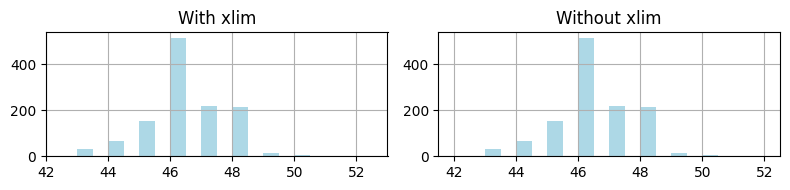

remove repeats
original size | new size | ratio  >>   1226 | 376 | 0.31
mean | median | std >> 46.23 | 46.00 | 1.51


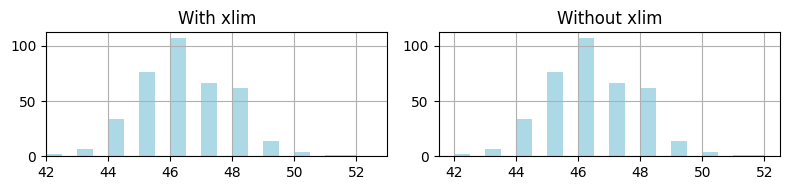

####################
RT4DCRDOT4
original data
mean | median | std >> 46.04 | 46.00 | 1.32


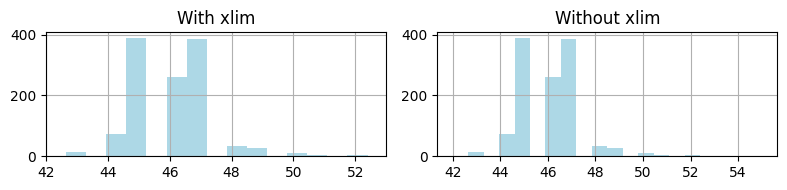

remove repeats
original size | new size | ratio  >>   1226 | 395 | 0.32
mean | median | std >> 46.15 | 46.00 | 1.73


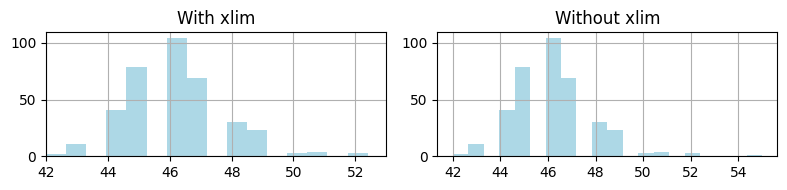

####################
RT4DCRDOT5
original data
mean | median | std >> 46.35 | 46.00 | 1.19


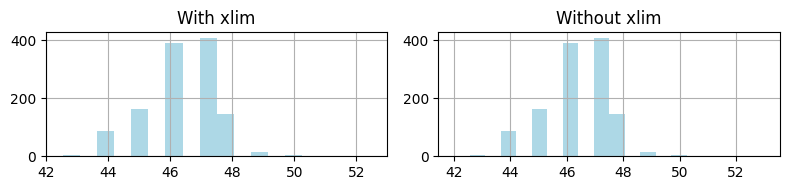

remove repeats
original size | new size | ratio  >>   1226 | 349 | 0.28
mean | median | std >> 46.25 | 46.00 | 1.50


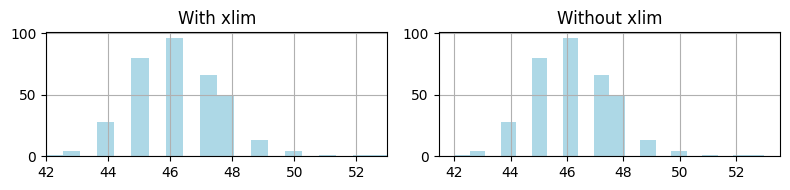

####################
RT4DCRDOT6
original data
mean | median | std >> 46.20 | 46.00 | 1.16


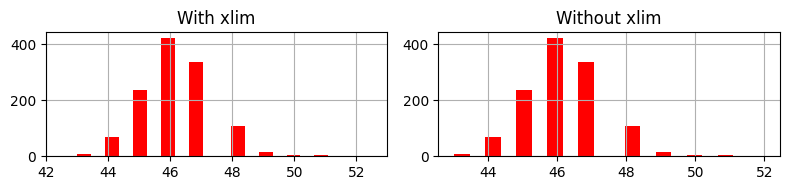

remove repeats
original size | new size | ratio  >>   1226 | 354 | 0.29
mean | median | std >> 46.16 | 46.00 | 1.45


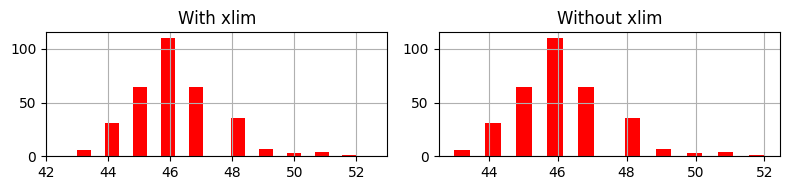

In [34]:
t1 = '2022-07-08'
t2 = '2022-07-18'
# frequency = '6H'
# calc_method = 'grouping'
# plot = 0


for signal in T4_signals:

  print('####################')
  print(signal)
  df_working = prepare_df(df, signal, t1, t2)
  print('original data')
  plot_histogram(df_working, signal)
  print('remove repeats')
  df_working = remove_repeats(df_working)
  plot_histogram(df_working, signal)


In [23]:
def arrange_df(df_input, signals):
  df_working = df_input.copy()
  df_working = df_working[signals]

  return df_working




## Distribution; Door Opening;


# To Do

1. histogram plot for standardised 40 - 60 on the x-axis
2. histogram plot for undefined x-axis. So outliers can be identified.

3. The above for
  A. whole train door opening
  B. whole train door closing
  C. LHS train door opening
  D. RHS train door closing
  E. Each car door opening
  F. Each car door closing
  G. Each door opening
  H. Each door closing

  